In [41]:
# FIRST STEP
# interact with the operating system 
import os
from pathlib import Path
import git
import glob
import csv
# data structuration and calculations
import pandas as pd  # to create data frames
import numpy as np   # most important numerical calculations
import pingouin as pg
# needed to extract the run number out of the parentesis of the string in the SPM.mat file
import re
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
################################################
# VARIABLES FOR PATH SELECTION AND DATA ACCESS #
################################################
HOME            = str(Path.home())
# DATA
STIM_DIR = os.path.join(HOME,'Documents/Magic_fMRI/Stimuli')
PROJ_DIR        = os.path.join(HOME, 'Documents/Magic_fMRI/DATA/MRI')
RAW_DIR         = os.path.join(PROJ_DIR, 'rawdata')
DERIVATIVES_DIR = os.path.join(PROJ_DIR, 'derivatives')
DATA_DIR = os.path.join(DERIVATIVES_DIR, 'univariate-ROI', 'SpecialMoment', 'EveryVideo')

In [4]:
#########################
# SHOWING RESULT TABLES #
#########################

In [5]:
friedman_type = pd.read_csv(os.path.join(DATA_DIR,'friedman_type.csv'))
friedman_type.to_excel('friedman_type.xlsx')

In [34]:
pre_post_wilcox = pd.read_csv(os.path.join(DATA_DIR,'pre_post_wilcoxon.csv'))
pre_post_wilcox.to_excel('pre_post_wilcoxon.xlsx')

In [35]:
post_hoc_wilcox = pd.read_csv(os.path.join(DATA_DIR,'prepost_type_posthoc_wilcoxon.csv'))
post_hoc_wilcox.to_excel('prepost_type_posthoc_wilcoxon.xlsx')

In [40]:
effect_object_rmANOVA = pd.read_csv(os.path.join(DATA_DIR,'effect_object_rmANOVA.csv'))
effect_object_rmANOVA

,F Value,Num DF,Den DF,Pr > F
0,2.030,2.0,46.0,0.143
1,13.901,2.0,46.0,0.000
2,2.024,4.0,92.0,0.097


In [41]:
post_hoc_effect_res = pd.read_csv(os.path.join(DATA_DIR,'post_hoc_Eff_results.csv'))
post_hoc_effect_res

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Effect,Appear,Change,True,True,-4.429,23.0,two-sided,0.000,0.001,bonf,150.079,-0.485
1,Effect,Appear,Vanish,True,True,-3.873,23.0,two-sided,0.001,0.002,bonf,44.032,-0.442
2,Effect,Change,Vanish,True,True,0.560,23.0,two-sided,0.581,1.000,bonf,0.248,0.041


In [42]:
appear_surprise_ttest_res = pd.read_csv(os.path.join(DATA_DIR,'appear_surprise_ttest_res.csv'))
appear_surprise_ttest_res

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,PrePost
0,5.531,23,greater,0.000,[0.64 inf],1.271,3511.567,1.000,all
1,6.371,23,greater,0.000,[0.94 inf],1.667,22200.000,1.000,pre
2,3.492,23,greater,0.001,[0.29 inf],0.738,38.869,0.969,post


In [89]:
# plotting parameter
# font settings - recommendation from here: https://towardsdatascience.com/making-publication-quality-figures-in-python-part-i-fig-and-axes-d86c3903ad9b
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
mpl.rcParams['font.family']='Arial'

# width and hight is given in inch 
# -> APA says a one column figure should be 2-3.25 inches and a two column figure should be 4.25-6.875 inches
one_col_width = 3.25
two_col_width = 6.875
# linewidth and markersize
linewidth = 2
markersize = 5
# fontsizes -> must be 8-14
titlefont = 14
labelfont = 12
legend_titlefont = 10
legendfont = 8
tickfont = 8

In [42]:
####################
# PLOTTING RESULTS #
####################
# The IVs and their levels we need
VIDEO_TYPE = [
    'Magic',
    'Control',
    'Surprise'
]

EFFECTS = [
    'Appear',
    'Change',
    'Vanish'
]

In [95]:
full_data_frame = pd.read_csv(filepath_or_buffer=os.path.join(DATA_DIR,'ratings_df.csv'))
na_removed = full_data_frame.pivot_table(index='ids',
                                         values='Ratings',
                                         columns=['PrePost', 'Type'],
                                         aggfunc='mean',
                                         dropna=True,
                                         fill_value=None)
na_removed = na_removed.melt(ignore_index=False, value_name = 'Ratings').reset_index()

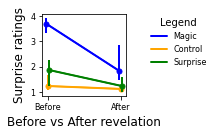

In [100]:
COLORS = ['blue', 'orange', 'green']
offset = [-.02,0,.02]
x = np.array([0,1])
fig = plt.figure(figsize=(one_col_width/2,one_col_width/2))
for c,vid_type in enumerate(VIDEO_TYPE):
    rating_pre = na_removed.loc[:,'Ratings'][(na_removed.Type==vid_type)&
                                             (na_removed.PrePost==0)]
    rating_post = na_removed.loc[:,'Ratings'][(na_removed.Type==vid_type)&
                                              (na_removed.PrePost==1)]
    pre_post_median  = [rating_pre.median(),rating_post.median()]
    pre_post_median  = np.array(pre_post_median)
    pre_quantiles = rating_pre.quantile([.25,.75])
    post_quantiles = rating_post.quantile([.25,.75])
    
    
    plt.plot(x+offset[c],
            pre_post_median, 
             color=COLORS[c], 
             label=vid_type,
             linewidth=linewidth,
            solid_capstyle='round')
    plt.plot(x+offset[c],
            pre_post_median, 
             color=COLORS[c], 
             marker='o',
             markersize=markersize)
    plt.vlines(x=0+offset[c], 
               ymin=pre_quantiles.values[0],
               ymax=pre_quantiles.values[1],
               colors=COLORS[c],
               linewidth=linewidth,)
    plt.vlines(x=1+offset[c], 
               ymin=post_quantiles.values[0],
               ymax=post_quantiles.values[1],
               colors=COLORS[c],
               linewidth=linewidth)
    # plt.fill_between([0,1], upper, lower, alpha=0.2)

plt.ylabel('Surprise ratings', fontsize=labelfont)
plt.xlabel('Before vs After revelation', fontsize=labelfont)
plt.xticks(ticks=[0,1], labels=['Before', 'After'],fontsize=tickfont)
plt.yticks(fontsize=tickfont)
legend = plt.legend(title='Legend', 
                    frameon=False,
                    bbox_to_anchor=(2,1), 
                    borderaxespad=0,
                    loc='upper right', 
                    fontsize=legendfont);

plt.setp(legend.get_title(), fontsize=legend_titlefont);
fig.savefig('Rating.eps',format = 'eps',bbox_inches='tight')

In [101]:
magic_df = full_data_frame[full_data_frame.Type=='Magic']
na_removed = magic_df.pivot_table(index='ids',
                                 values='Ratings',
                                 columns=['Effect', 'Objects'],
                                 aggfunc='mean',
                                 dropna=True,
                                 fill_value=None)
na_removed = na_removed.melt(ignore_index=False, value_name = 'Ratings').reset_index()

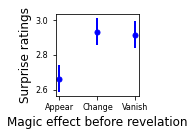

In [102]:
fig = plt.figure(figsize=(one_col_width/2,one_col_width/2))
eff_values  = []
eff_sems    = []
for eff in EFFECTS:
    eff_ratings = na_removed.loc[:,'Ratings'][(na_removed.Effect==eff)]
    eff_values.append(eff_ratings.mean())
    eff_sems.append(eff_ratings.sem())
    
eff_values  = np.array(eff_values)
eff_sems    = np.array(eff_sems)
upper = eff_values+eff_sems
lower = eff_values-eff_sems
plt.plot(eff_values, 'o', markersize=markersize, color='blue')
plt.vlines(x=0, 
           ymin=lower[0], 
           ymax=upper[0], 
           colors='blue',
           linewidth=linewidth)
plt.vlines(x=1, 
           ymin=lower[1], 
           ymax=upper[1],
           colors='blue',
           linewidth=linewidth)
plt.vlines(x=2, 
           ymin=lower[2], 
           ymax=upper[2],
           colors='blue',
           linewidth=linewidth)

plt.xticks([0,1,2],
           labels=['Appear','Change','Vanish'], 
           fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.ylabel('Surprise ratings', fontsize=labelfont)
plt.xlabel('Magic effect before revelation', fontsize=labelfont);

fig.savefig('EffectRating.eps',format = 'eps',bbox_inches='tight')